<a href="https://colab.research.google.com/github/pixelatedAF/Heart-Diseases/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [34]:
train=pd.read_csv('heart_2020_cleaned.csv')

###DATA CLEANING
given data is clean data

In [30]:
print(train.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [31]:
print(train.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


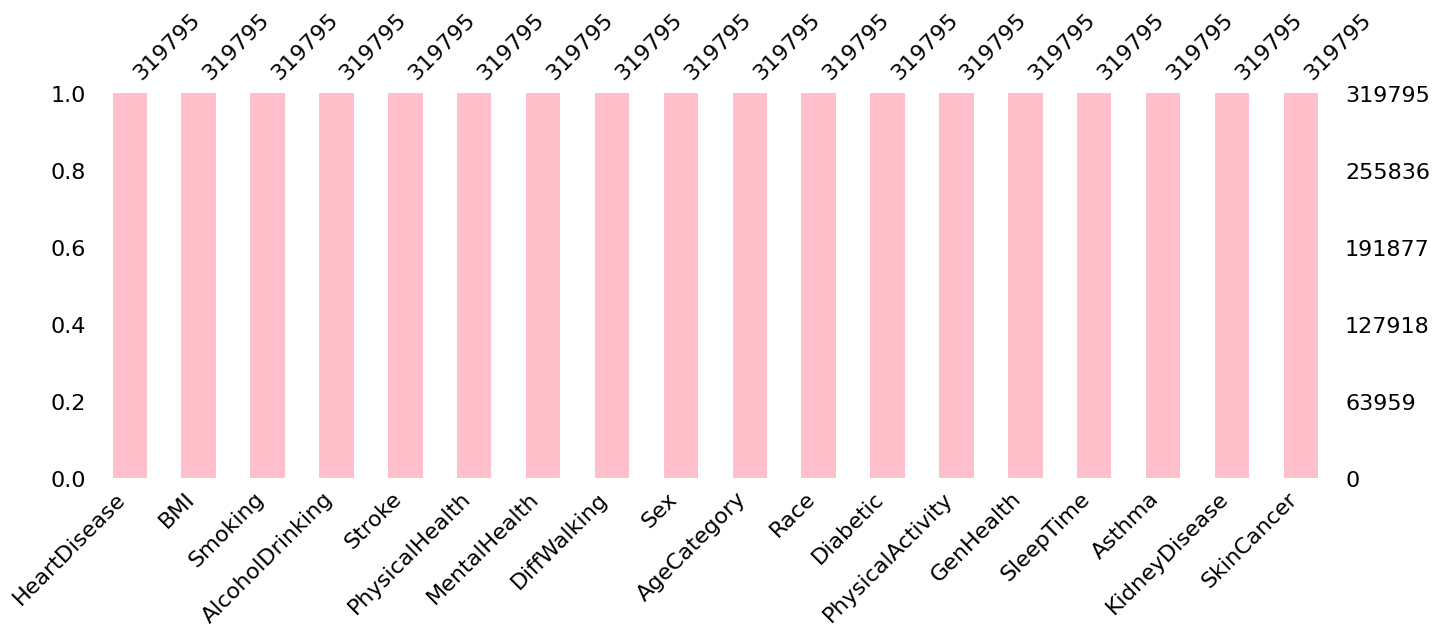

In [32]:
#check dataset for gaps in data
msno.bar(train,figsize=(16,5),color='pink')
plt.show()

###DATA VISUALIZATION

<Axes: xlabel='HeartDisease', ylabel='count'>

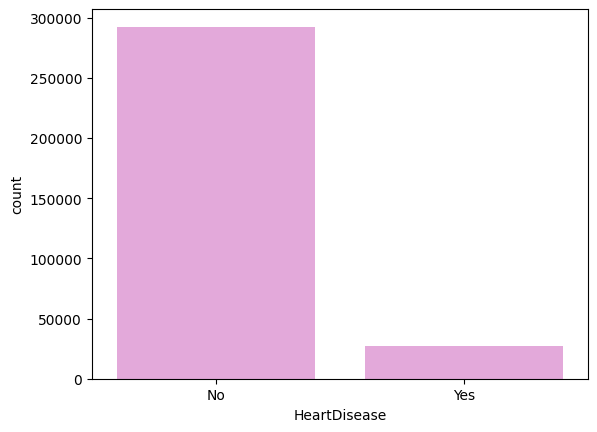

In [35]:
#distribution of the target variable-heart disease-yes/no
sns.countplot(x='HeartDisease',data=train,color='#ed9fe1')


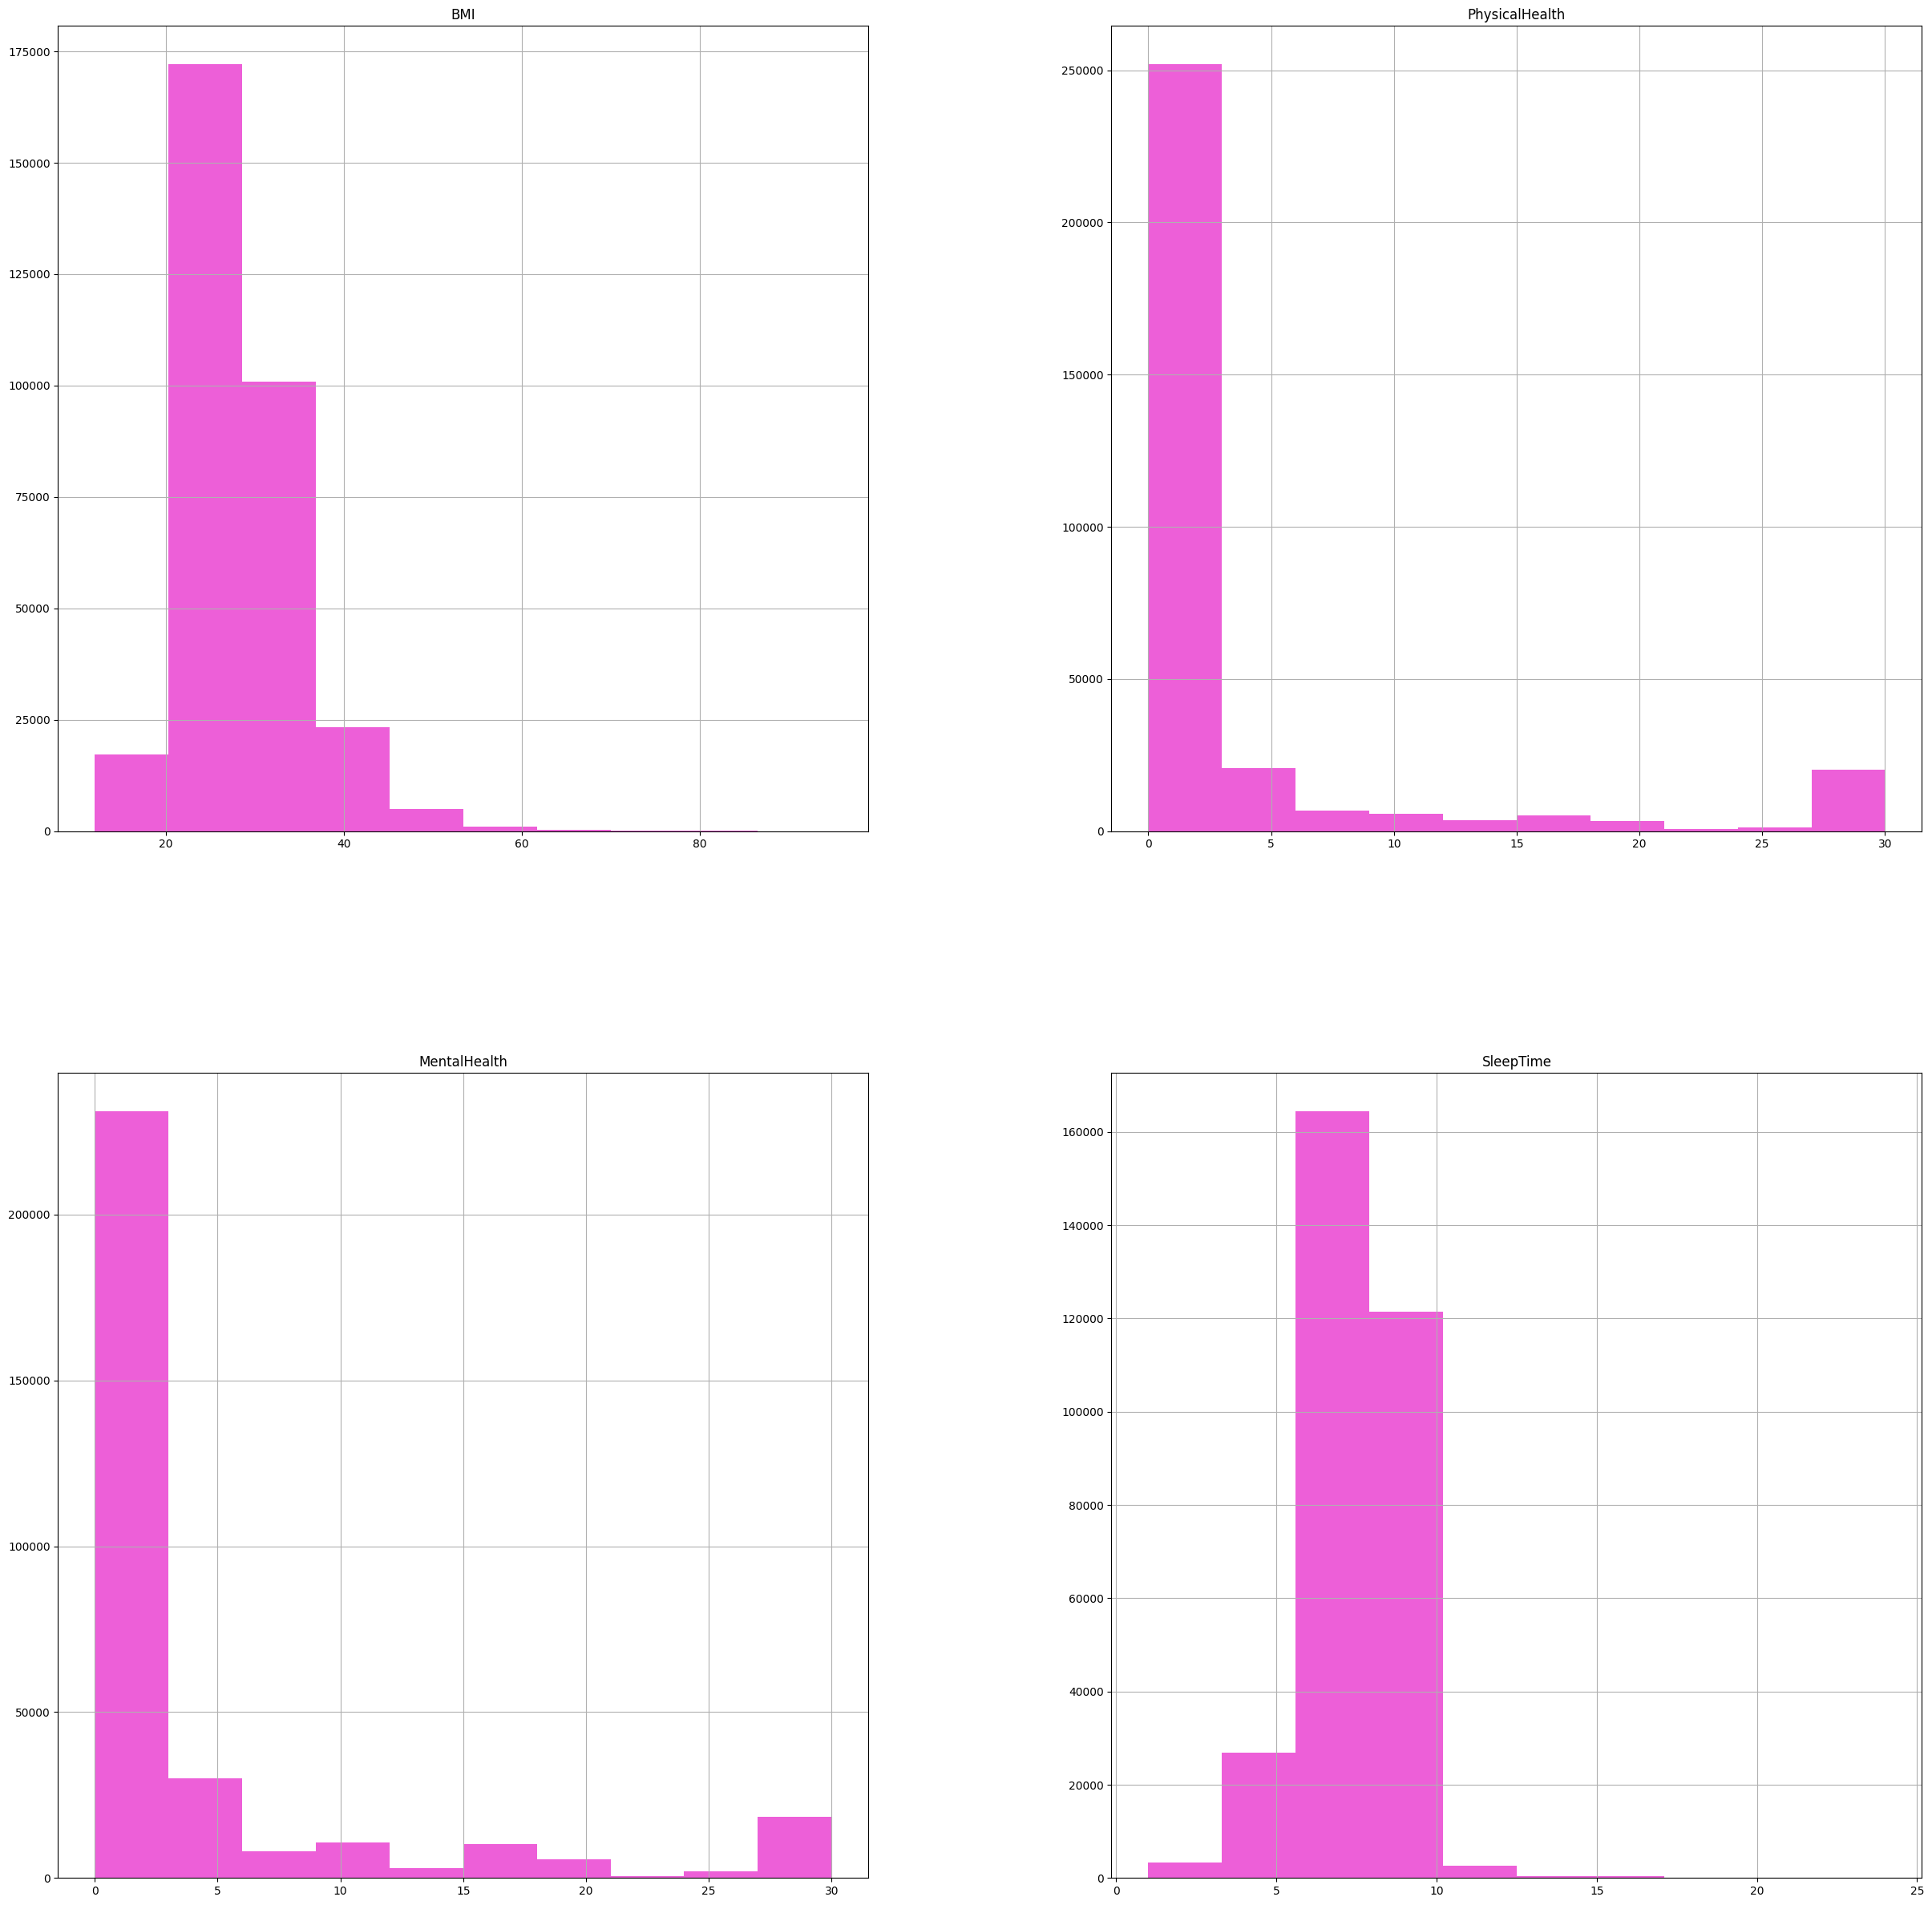

In [36]:
#plot the histograms for each feature:
train.hist(figsize = (30,30), color = '#ed5fd8')
plt.show()

In [37]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


In [38]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

numerical cols-BMI,Physical Heath,Mental Health,Sleep time
rest of em r categorical values

In [39]:
numeric_features=['BMI','PhysicalHealth','MentalHealth','SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

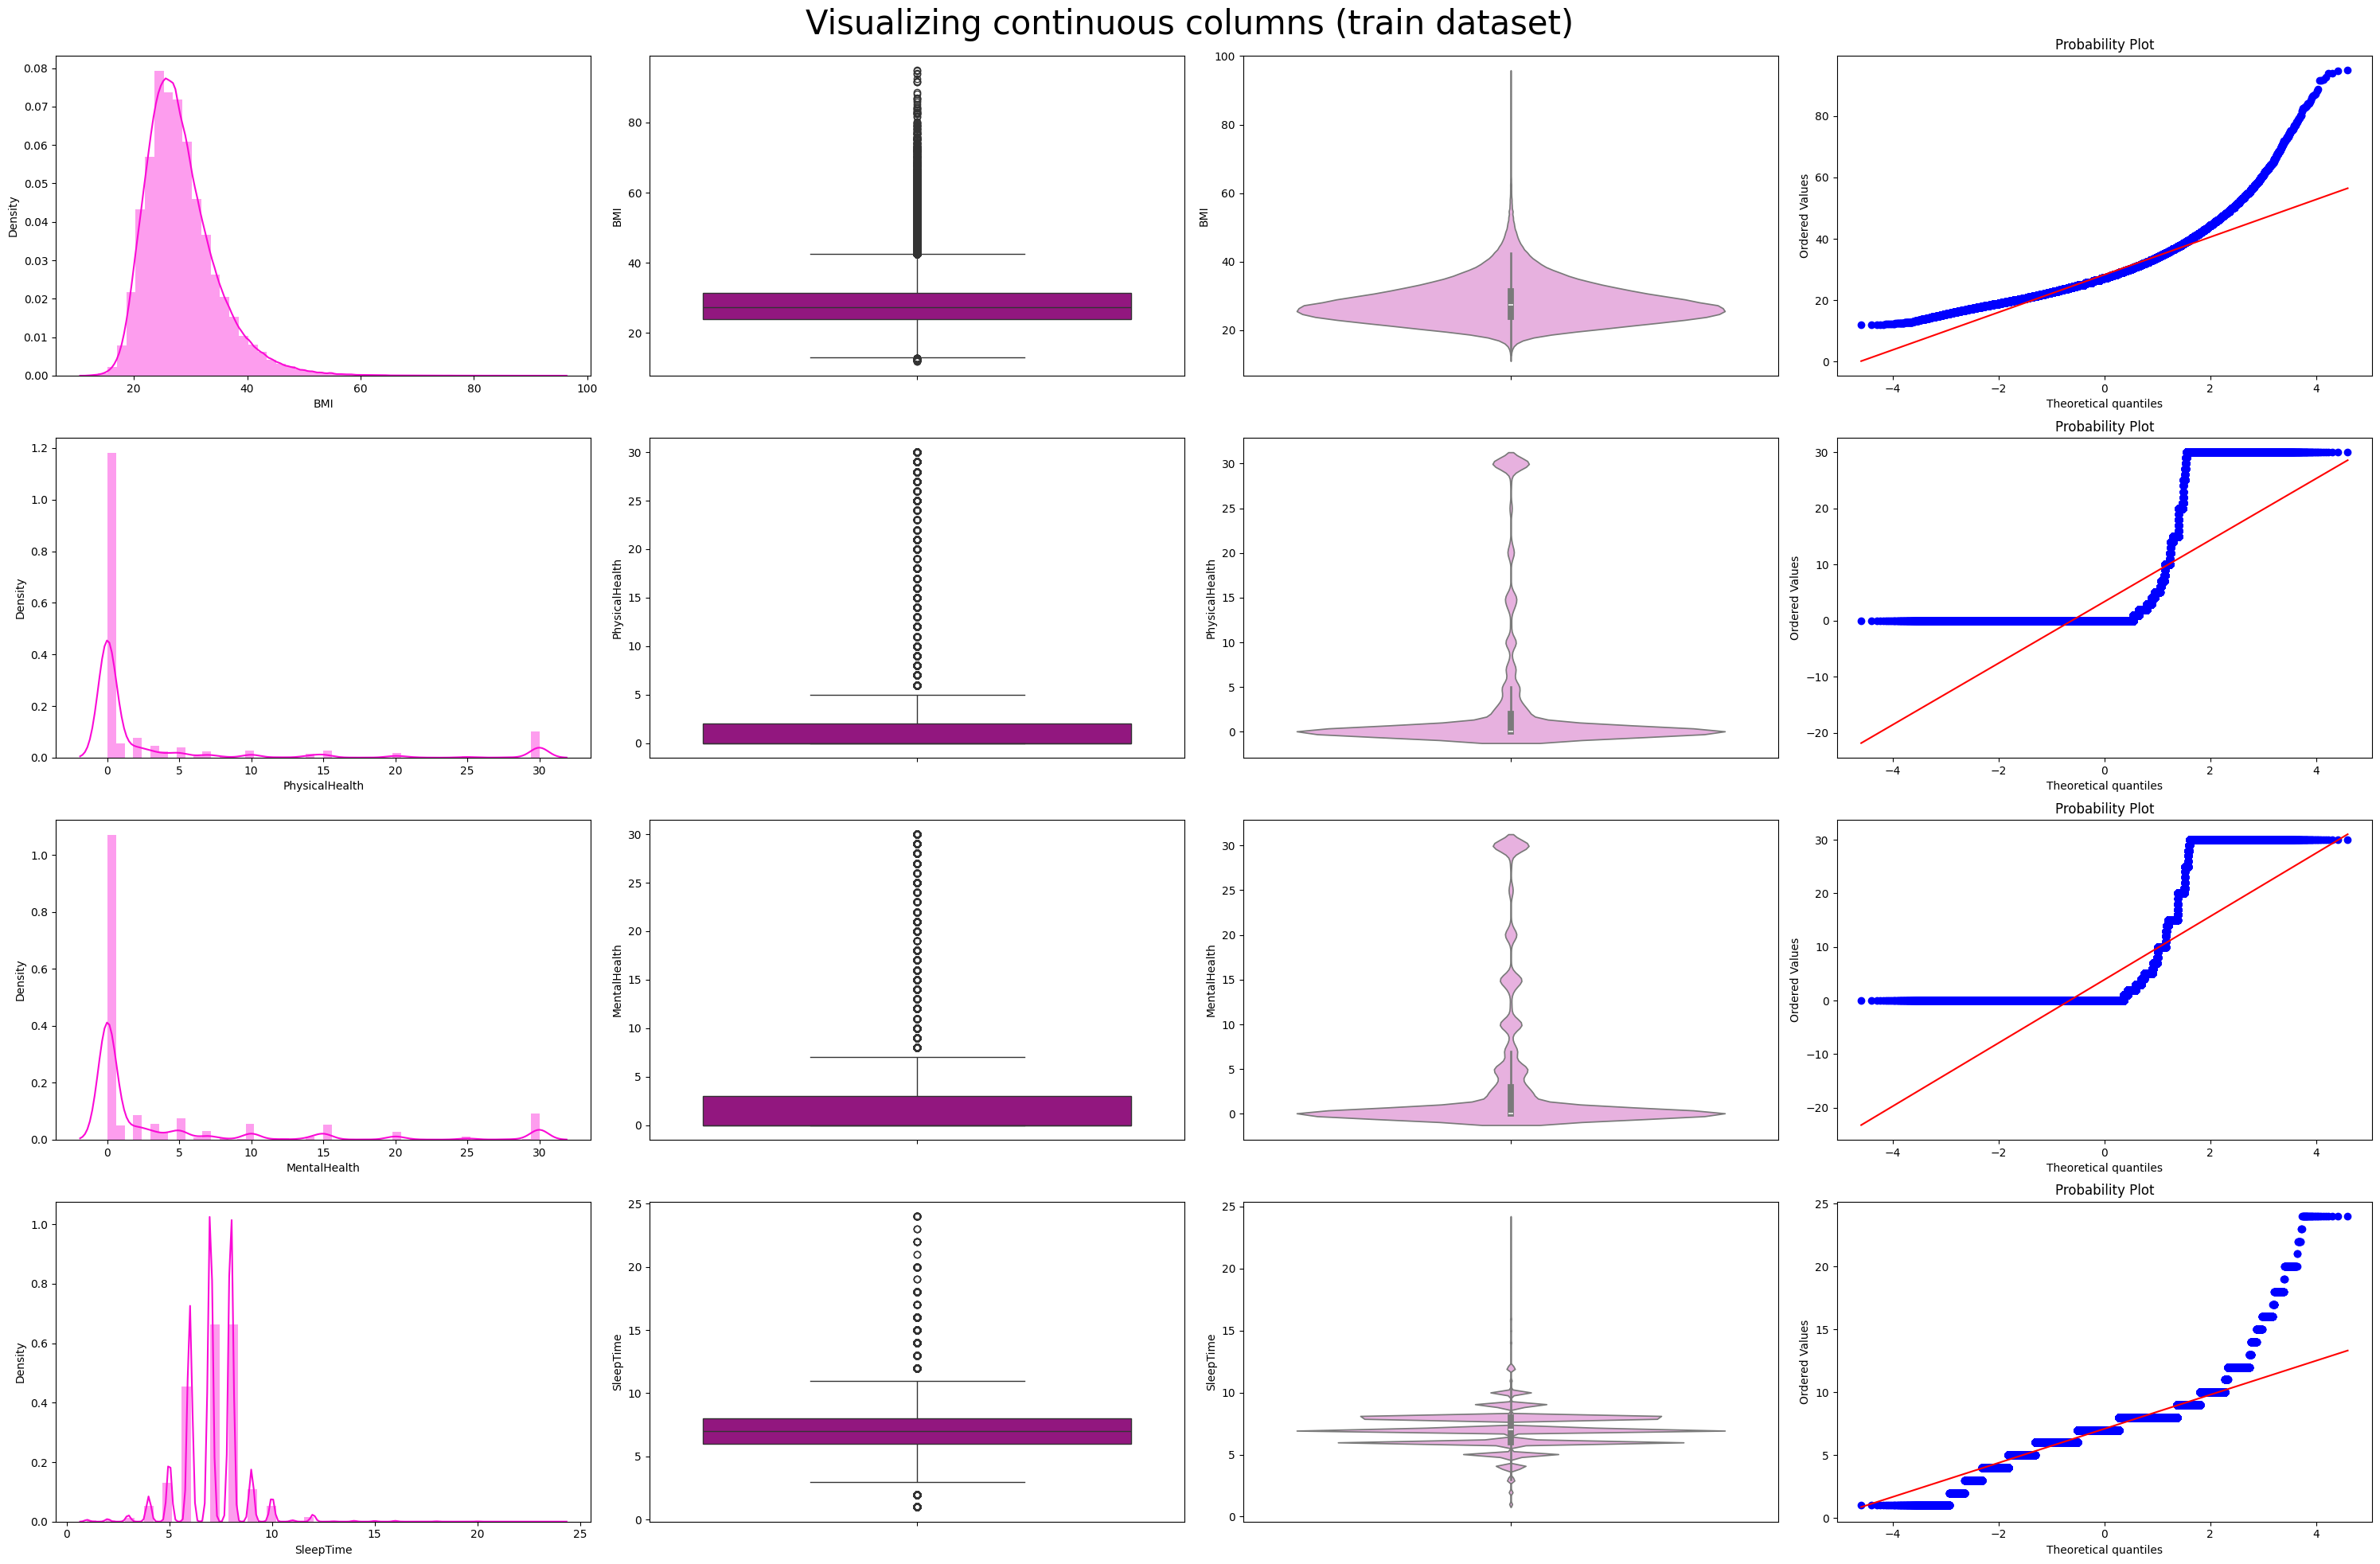

In [40]:
#analyze numeric vals
#Ignore warning messages during execution to make the output cleaner, especially from libraries like Seaborn or Matplotlib.
import warnings
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(train[i],ax=ax[index,0],color='#fa0ad6')
    sns.boxplot(train[i],ax=ax[index,1],color='#a6038d')
    sns.violinplot(train[i],ax=ax[index,2],color='#f0a8e5')
    stats.probplot(train[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)


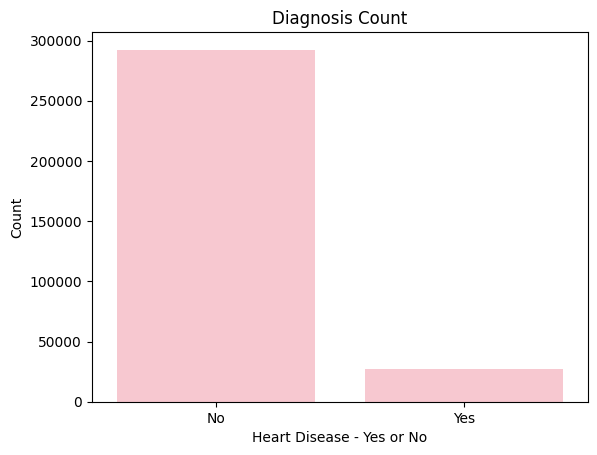

In [41]:
#diagnosis count
# Count plot for a categorical feature
sns.countplot(data=train, x='HeartDisease',color='pink')
plt.title('Diagnosis Count')
plt.xlabel('Heart Disease - Yes or No')
plt.ylabel('Count')
plt.show()


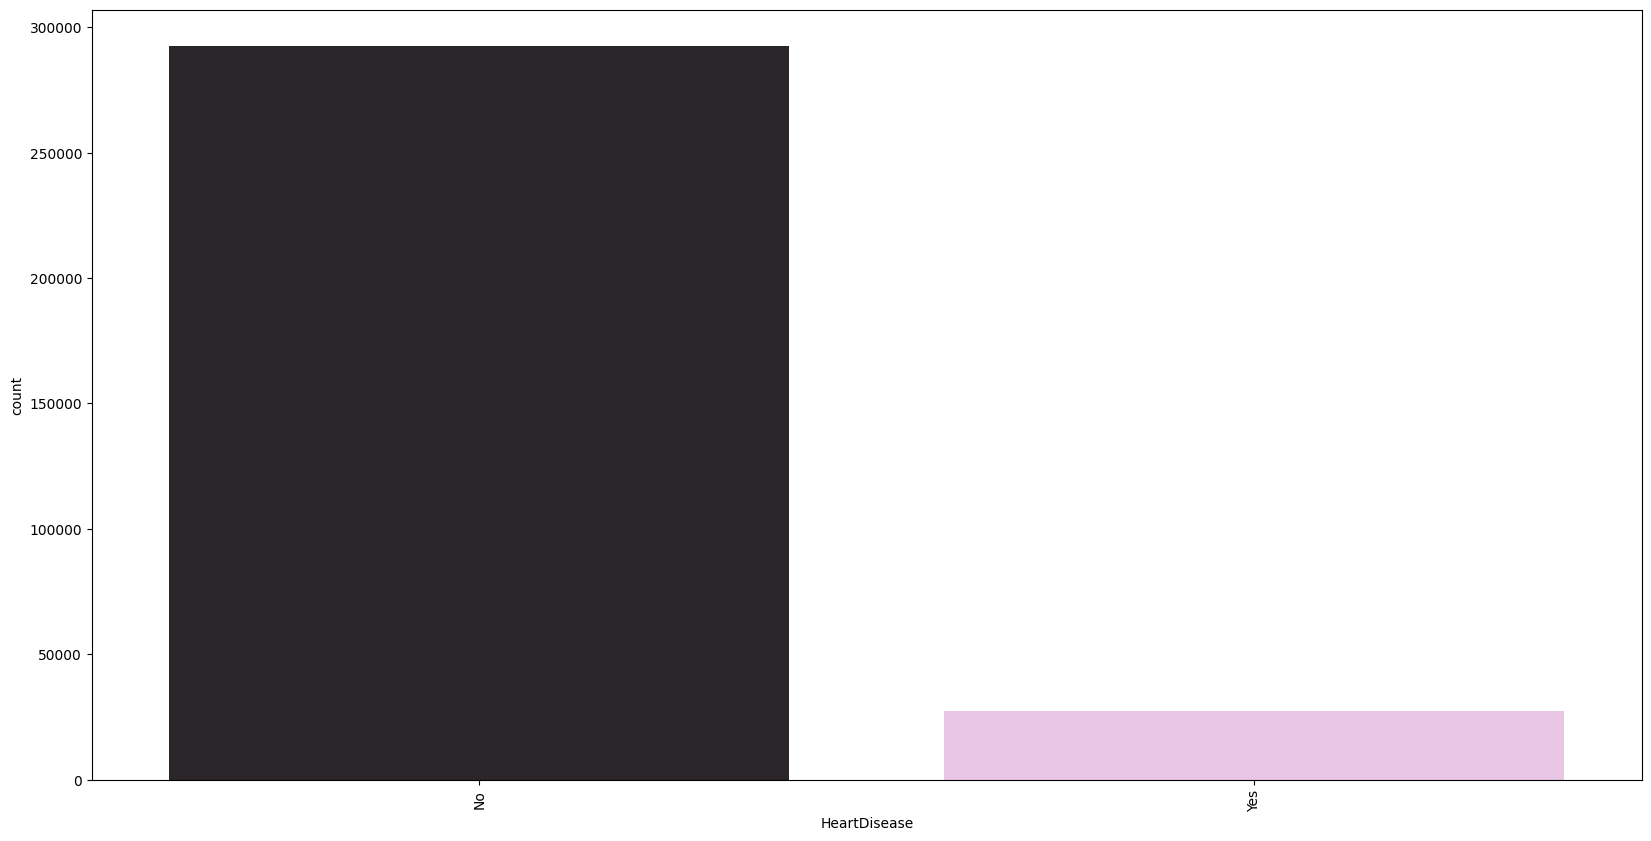

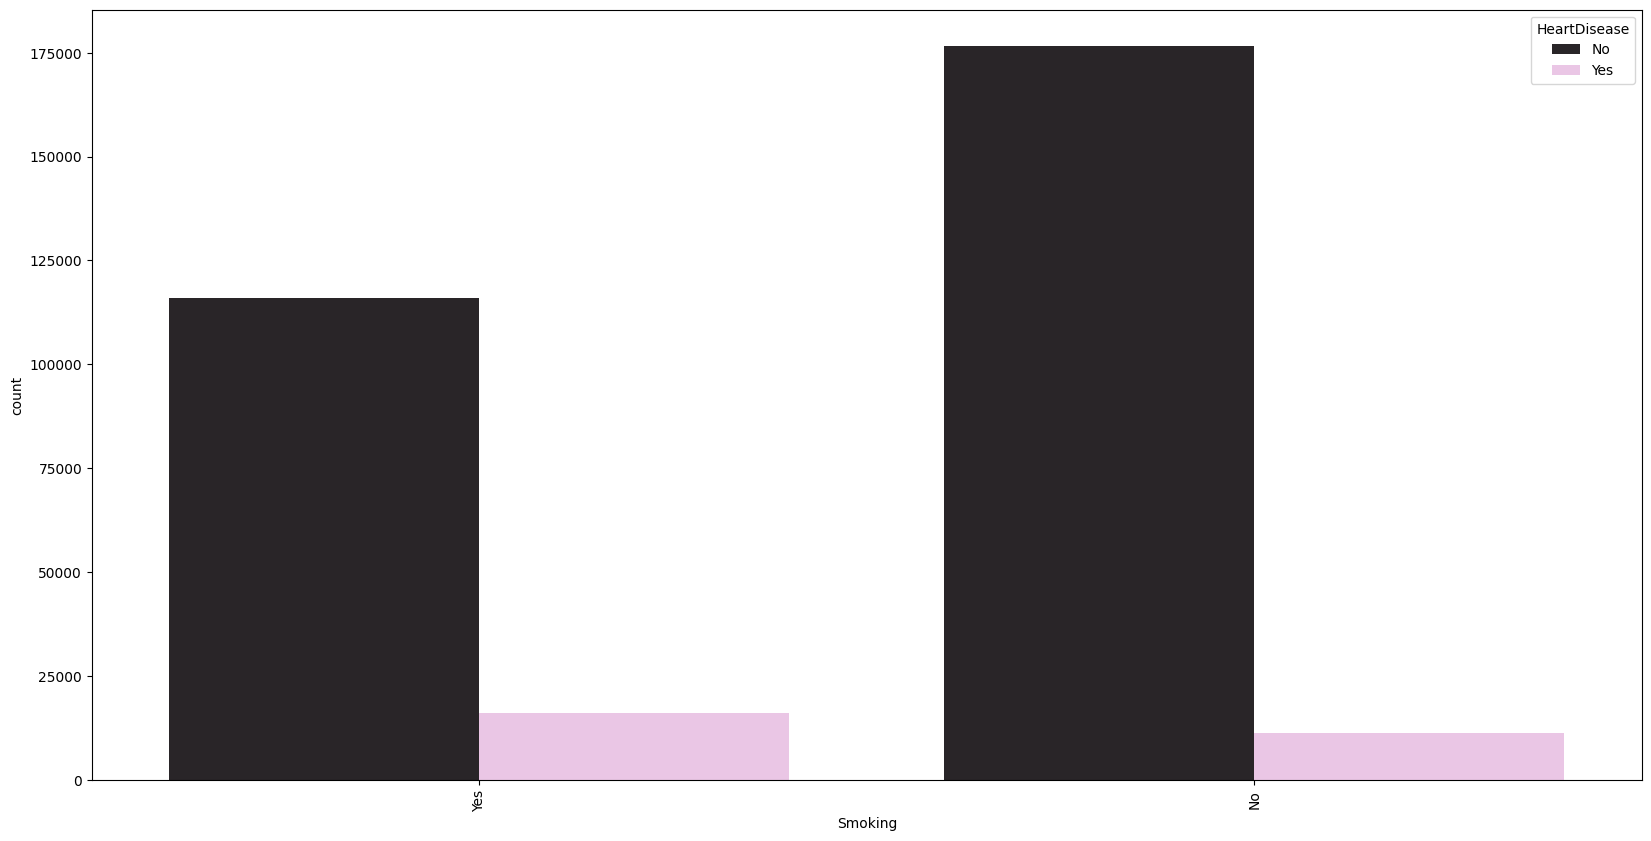

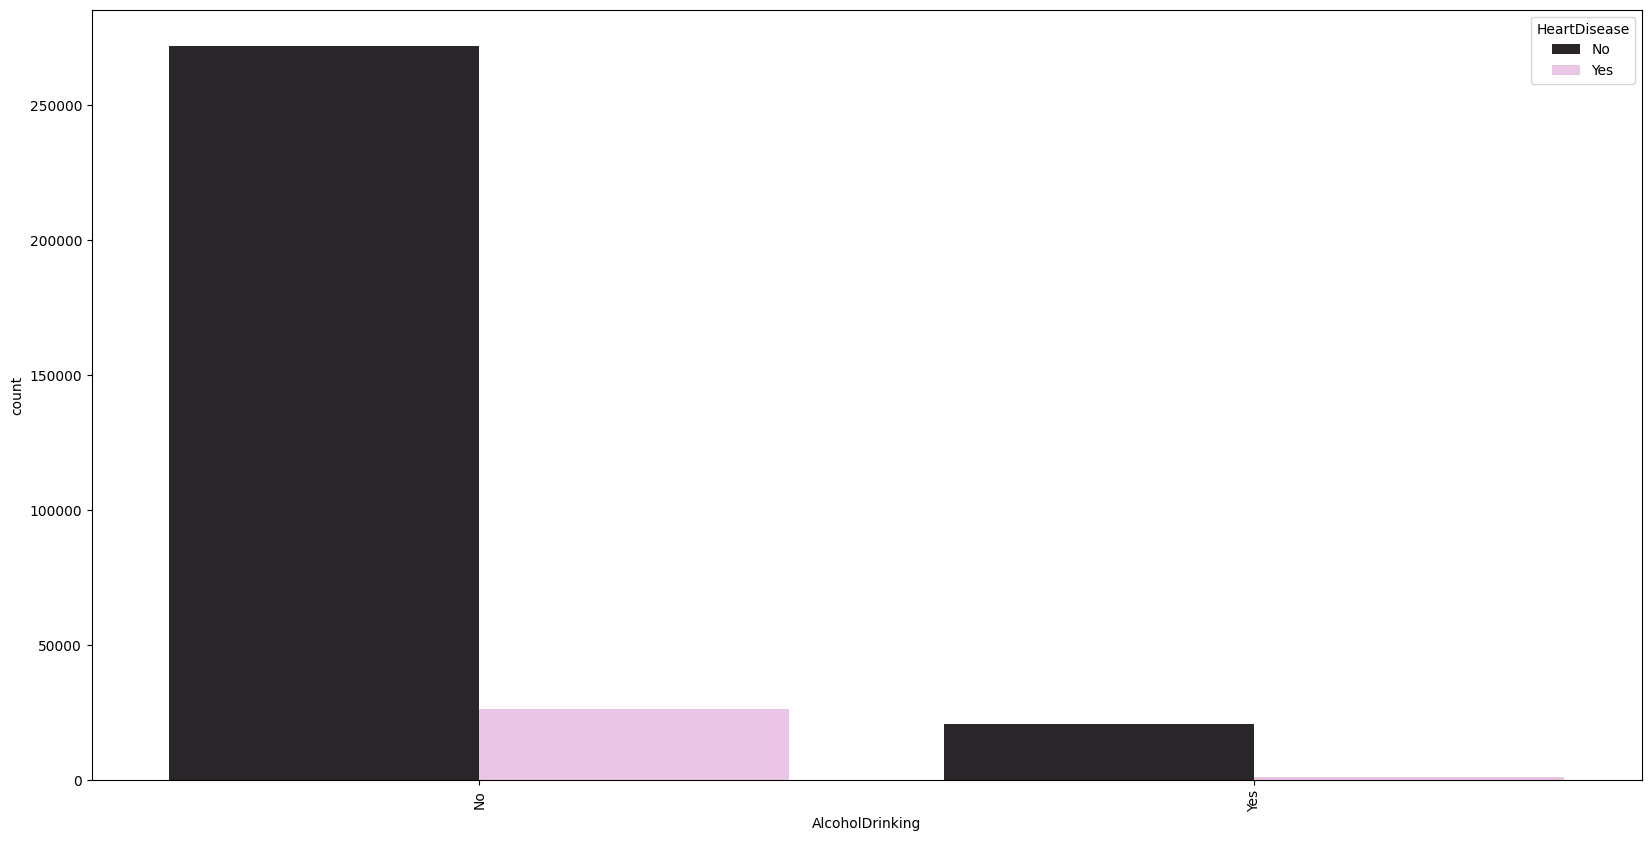

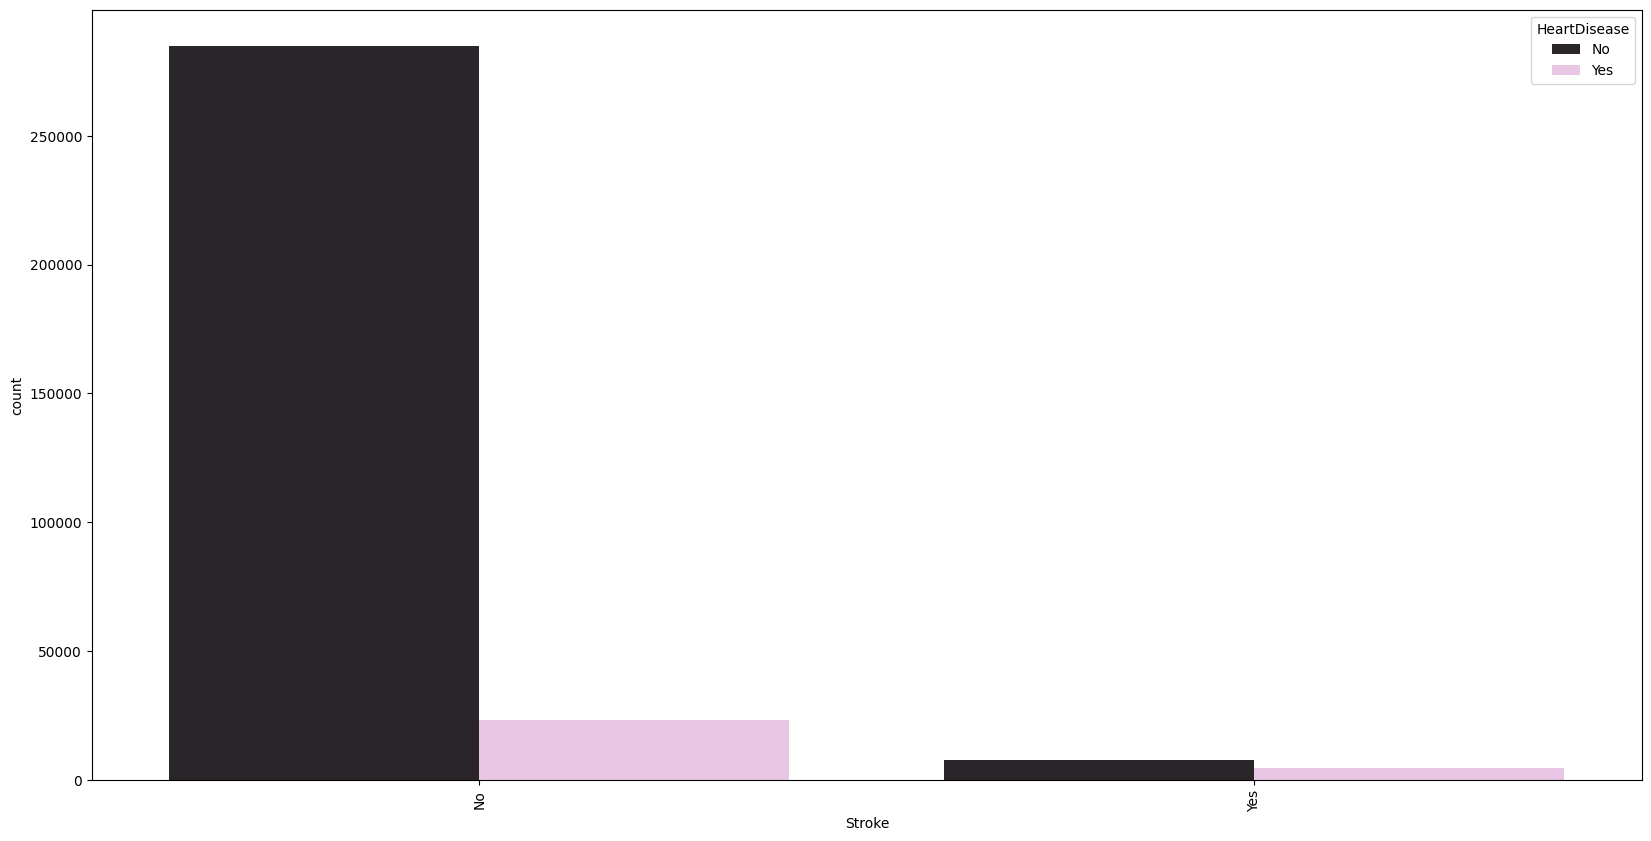

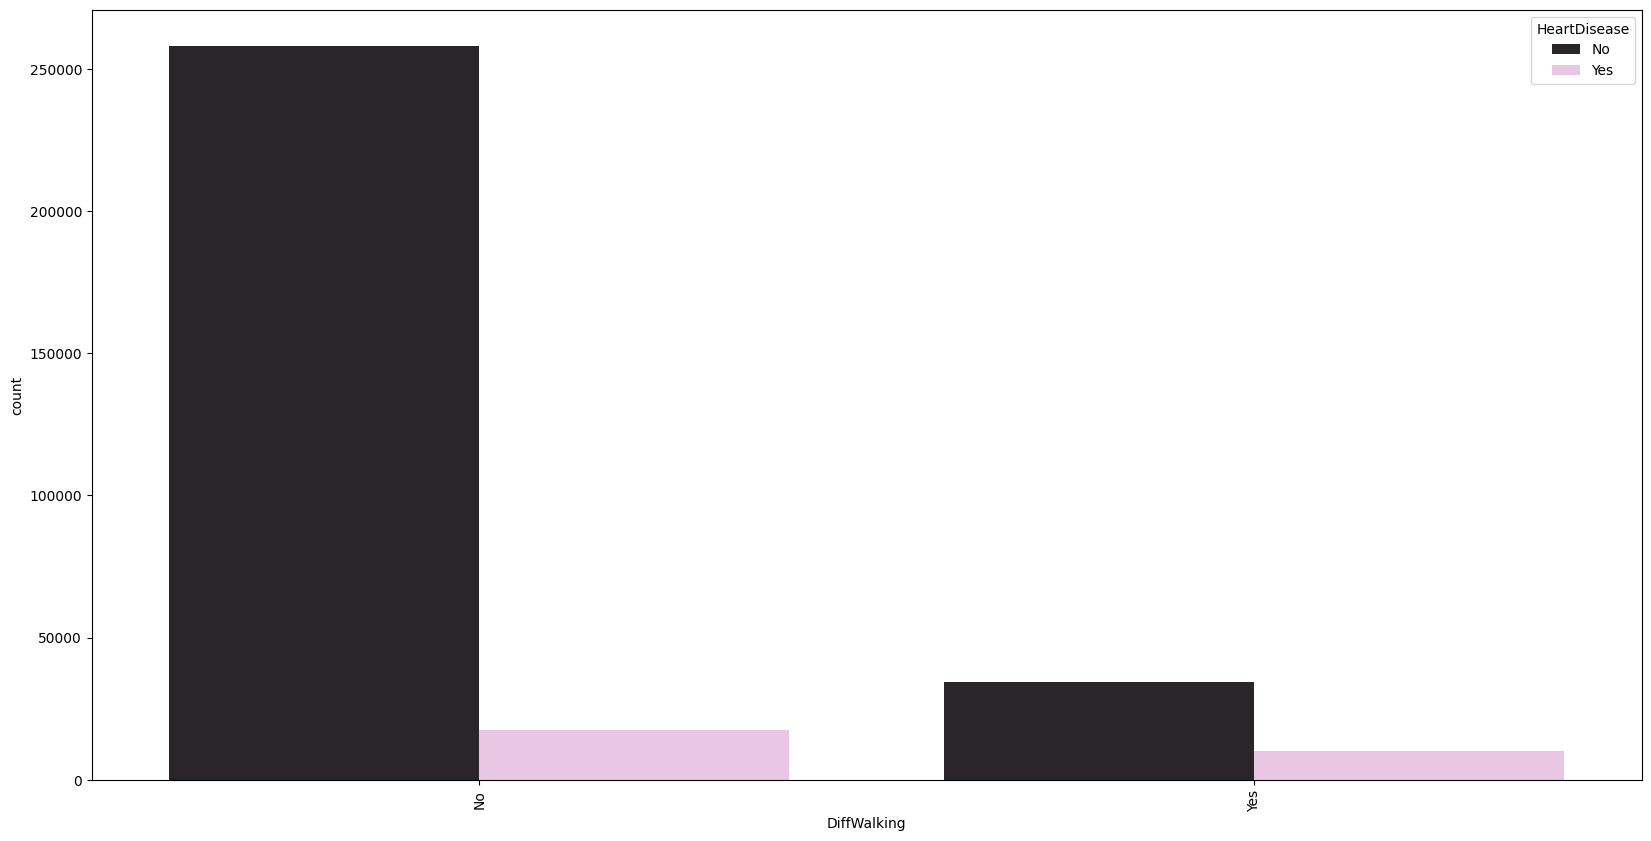

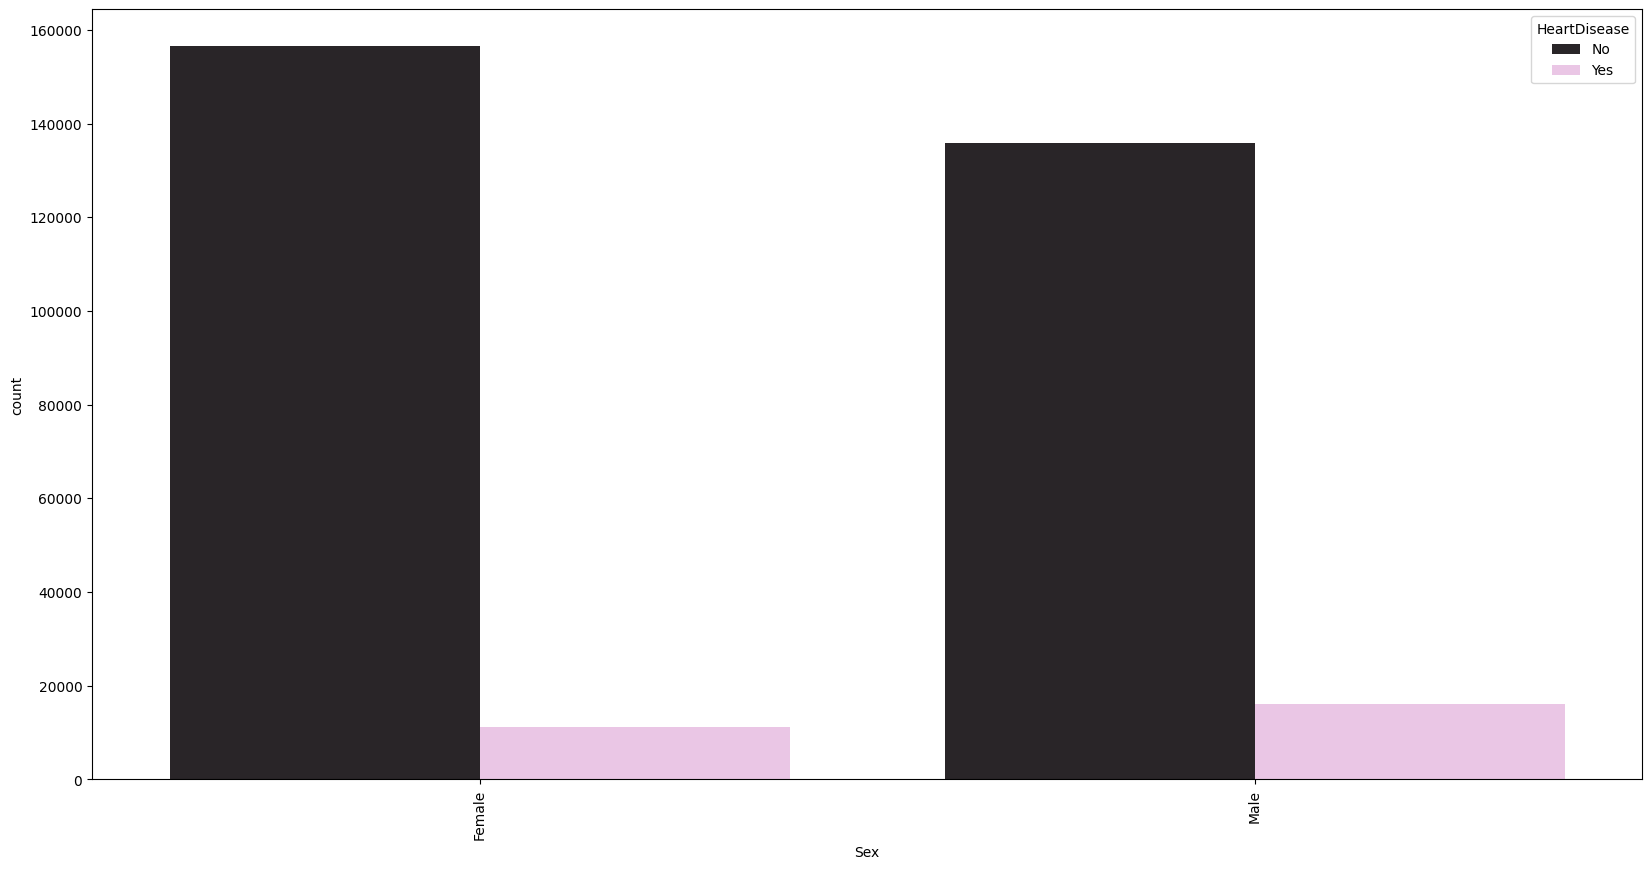

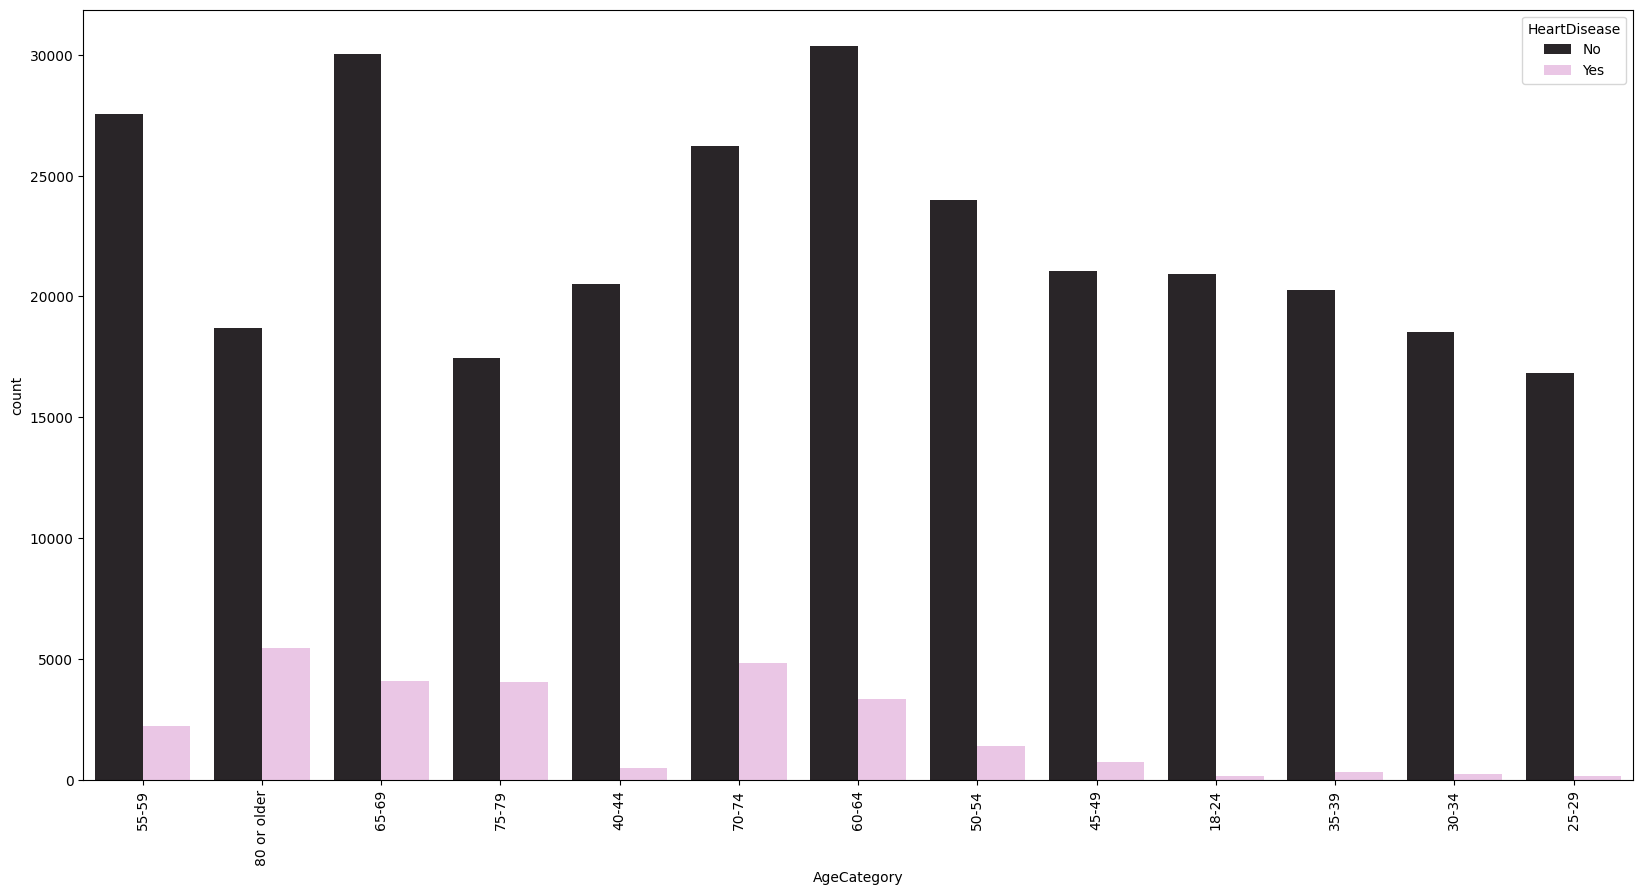

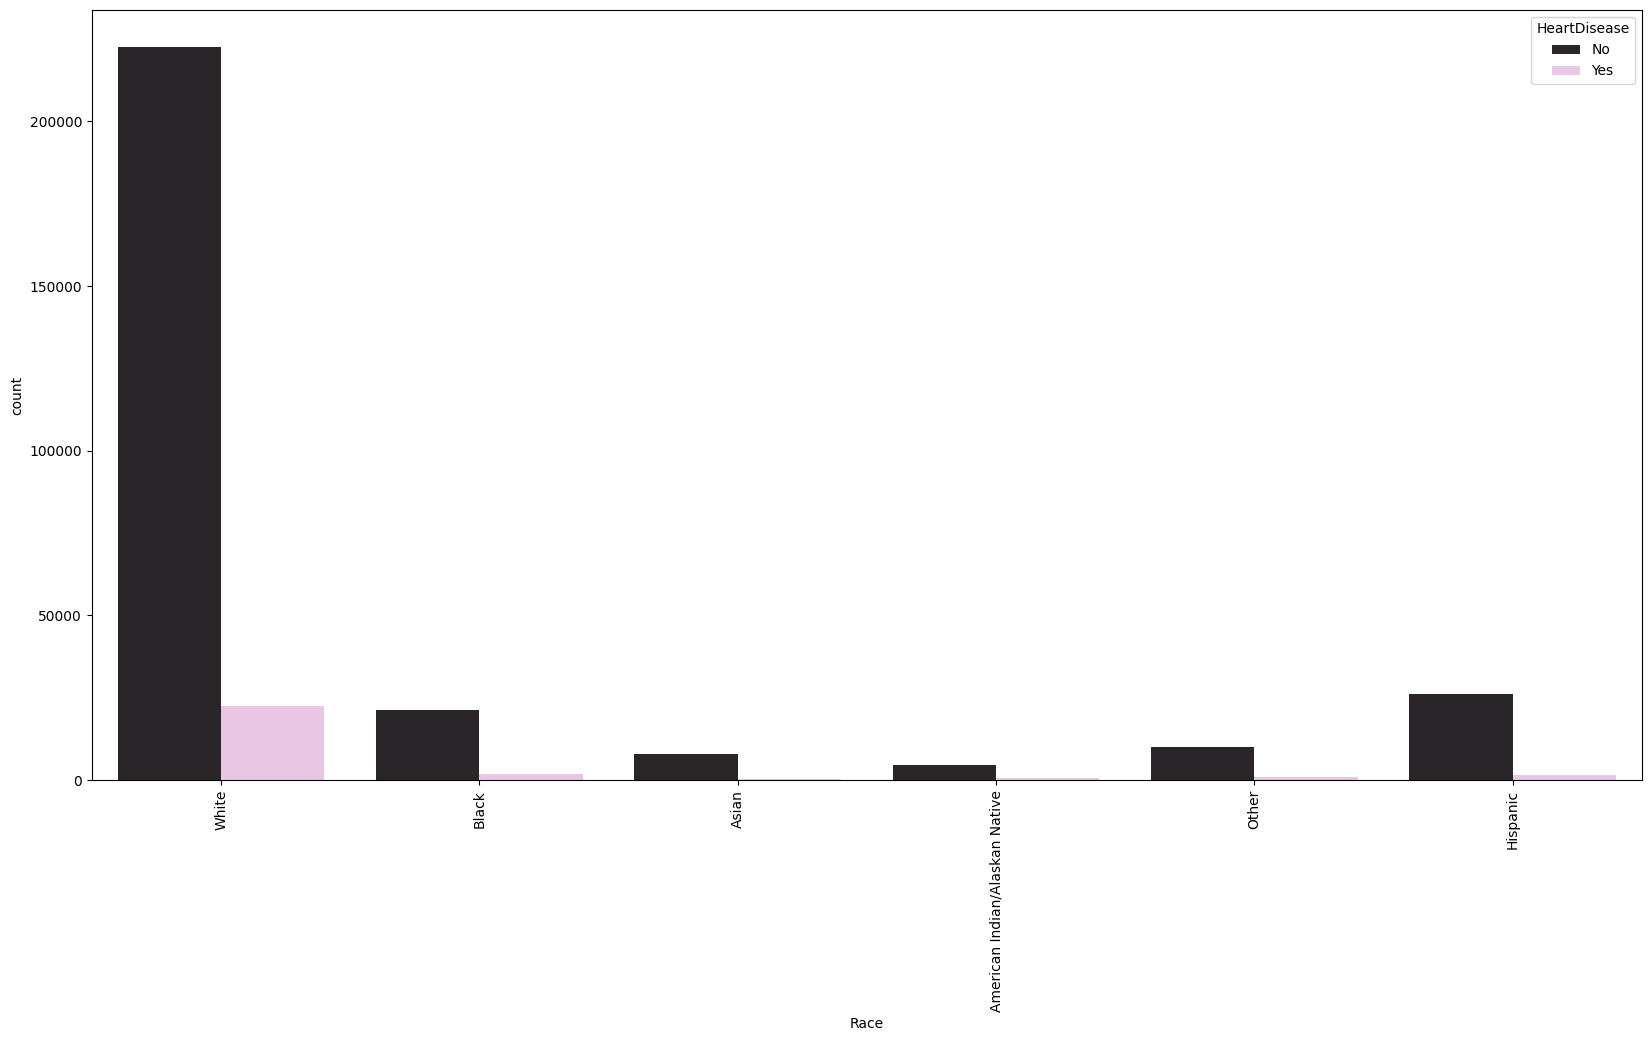

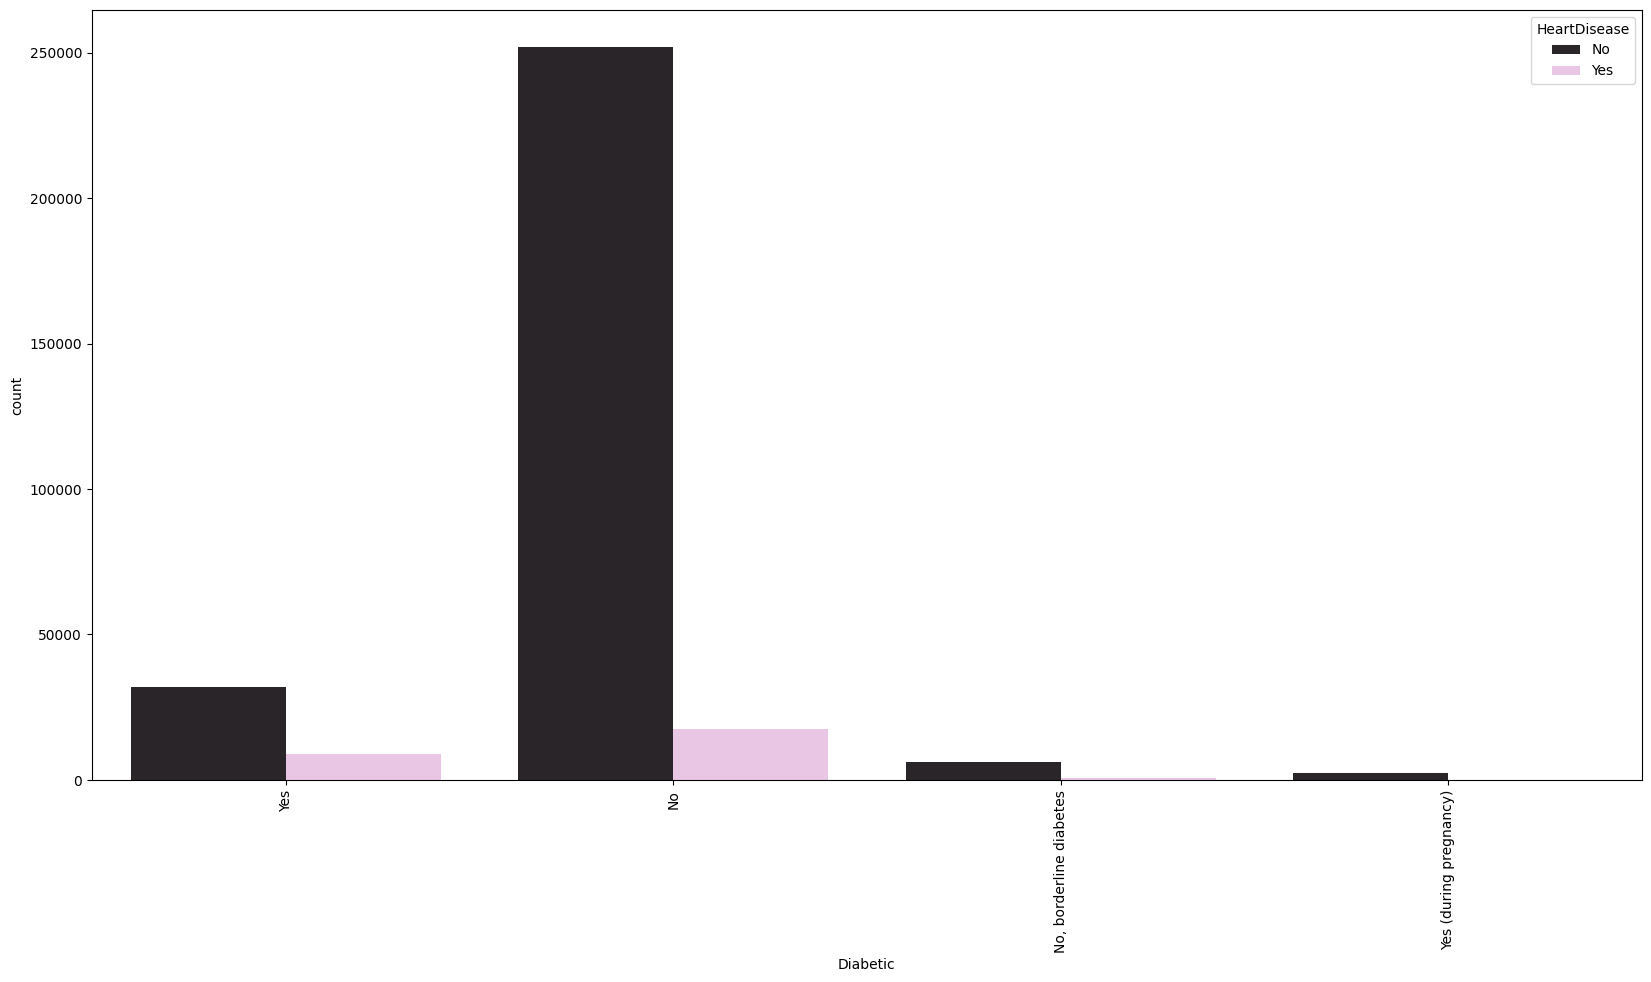

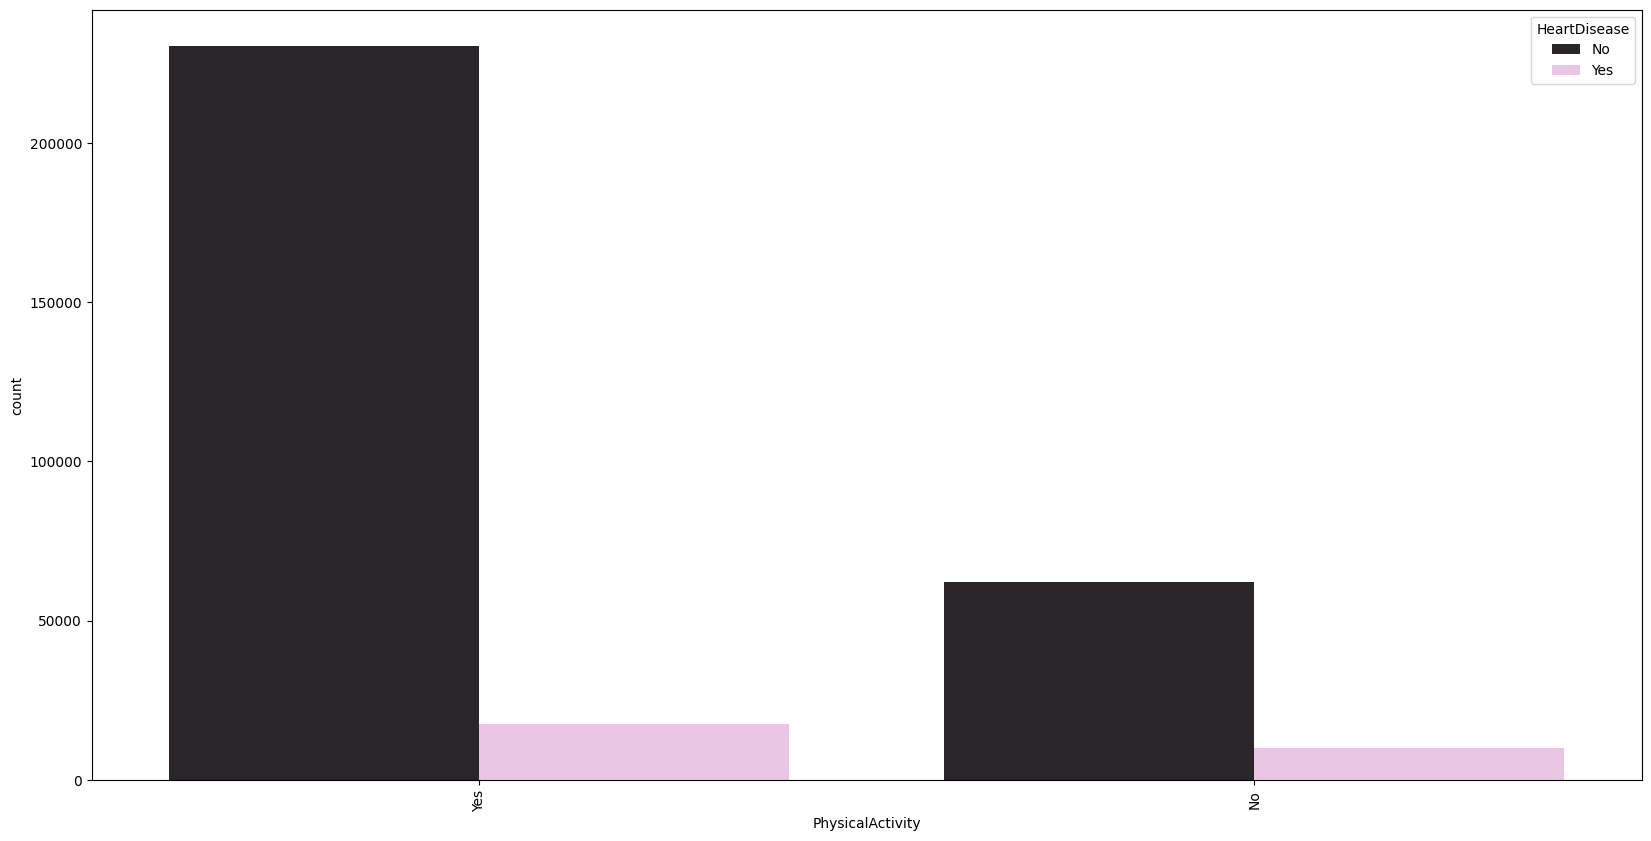

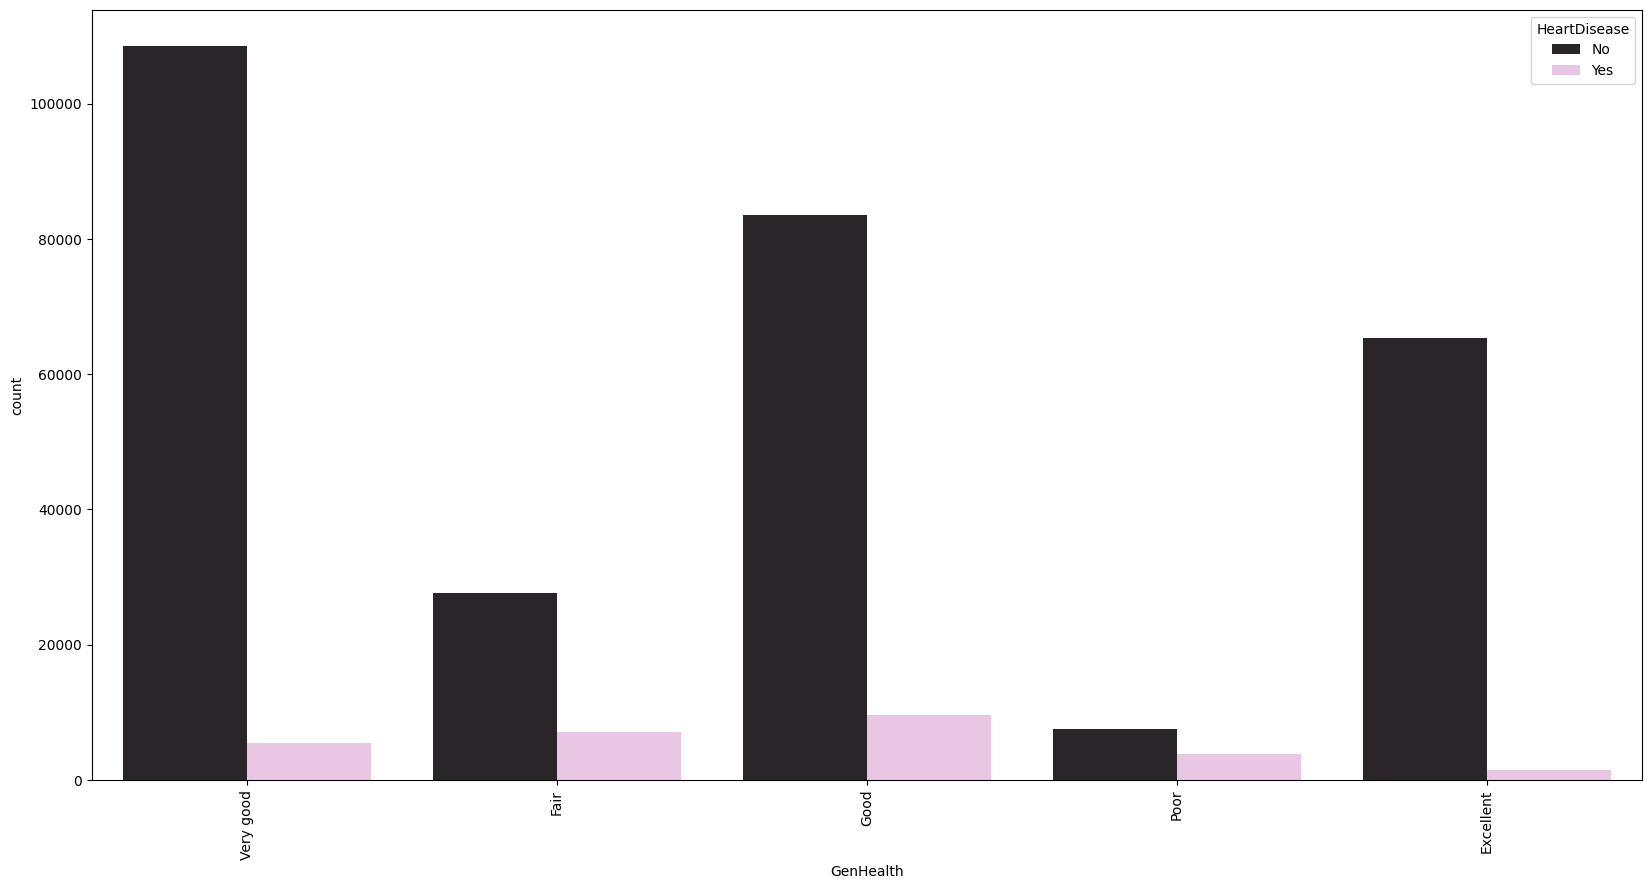

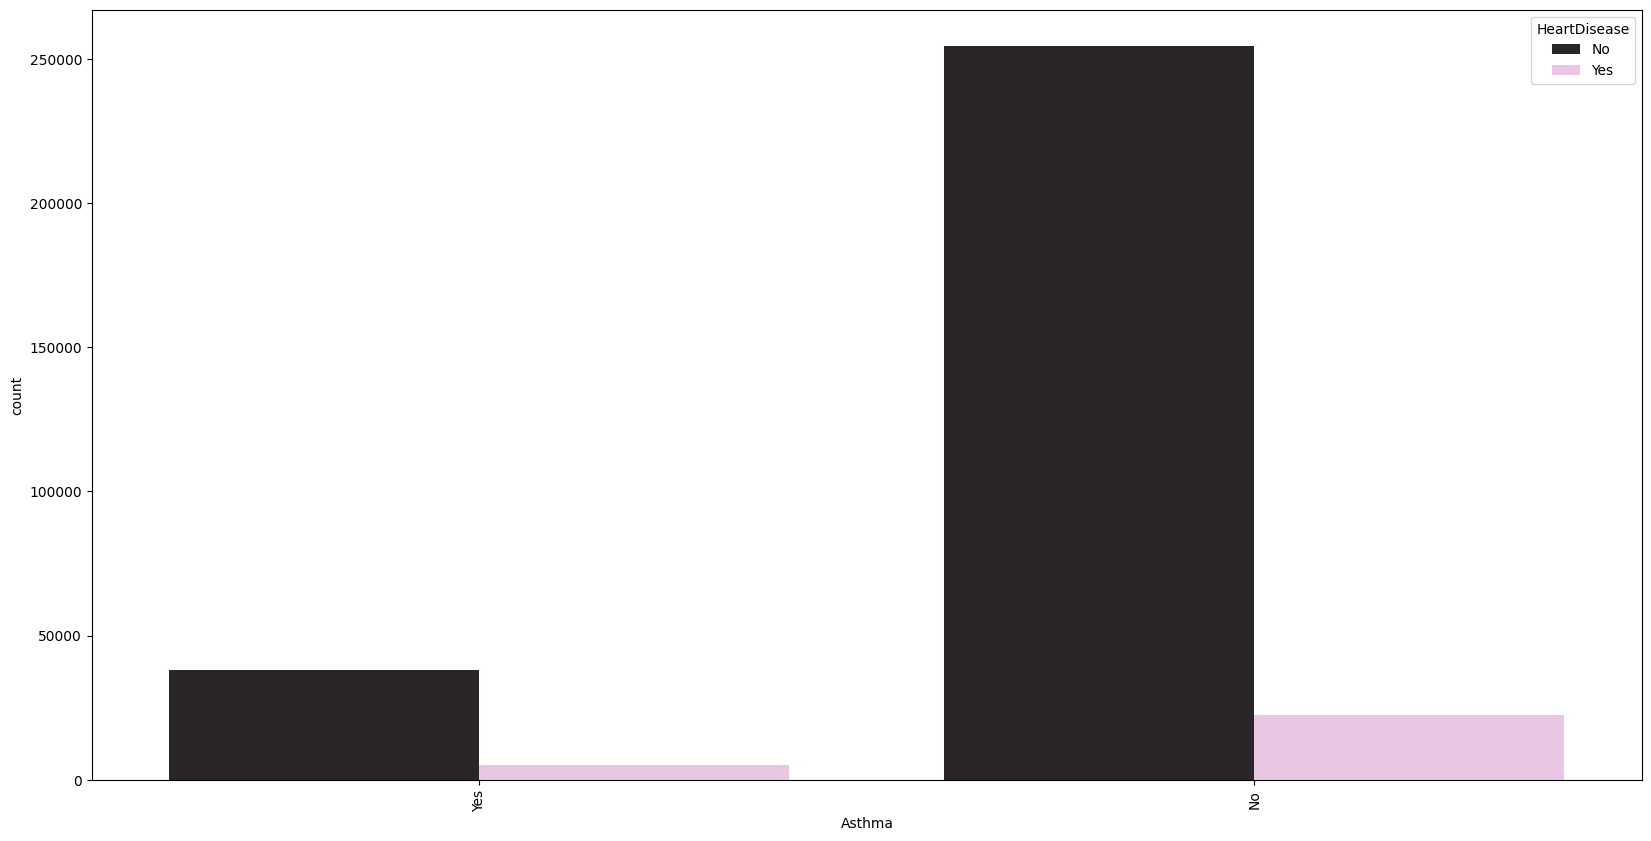

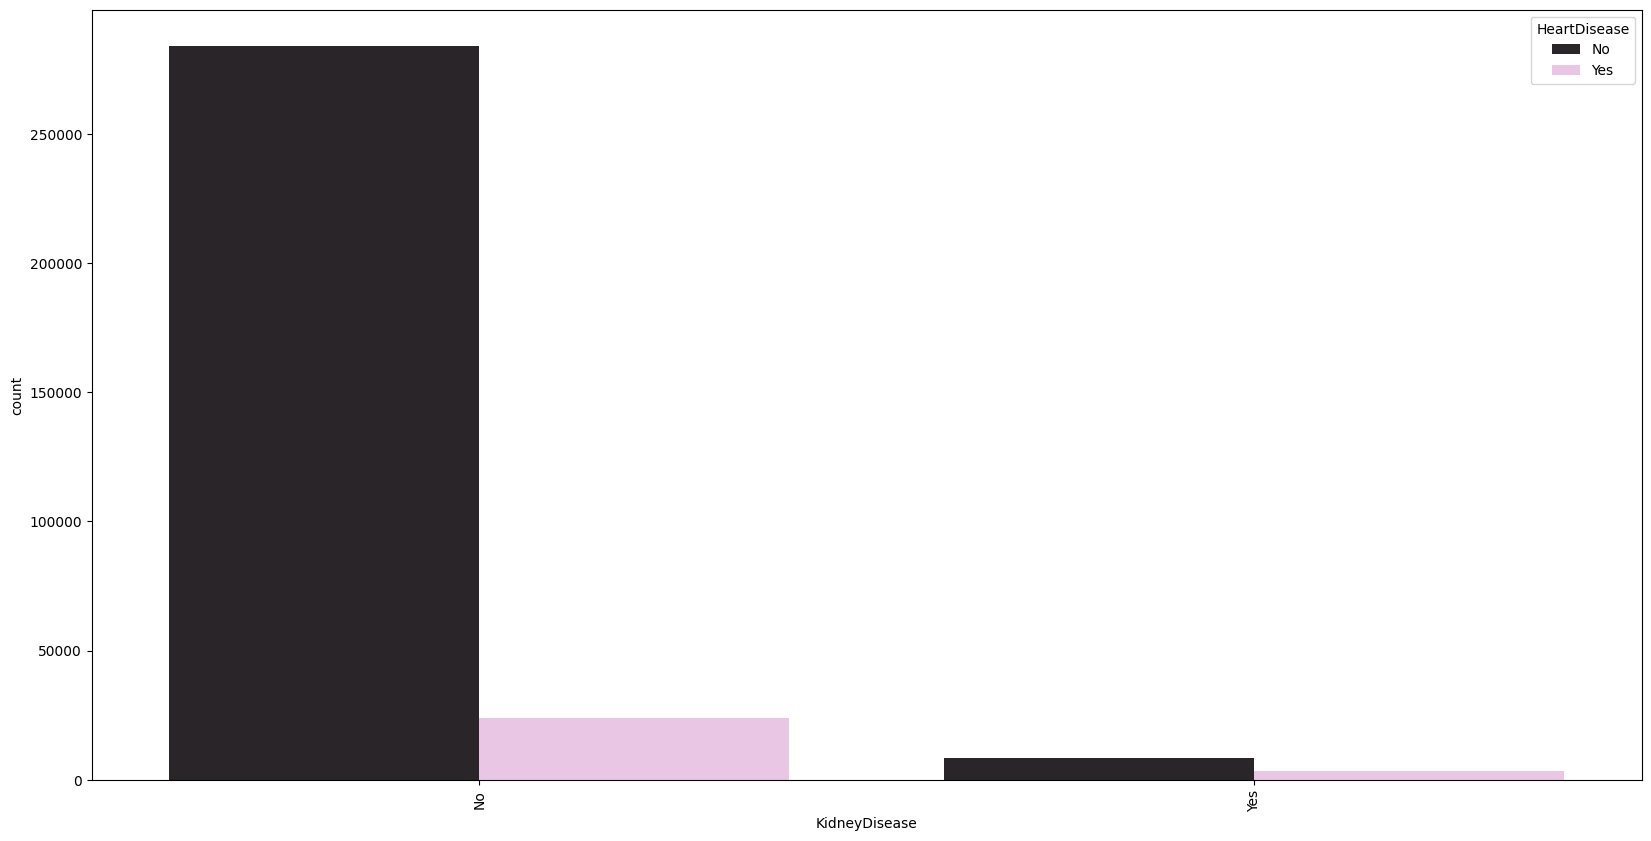

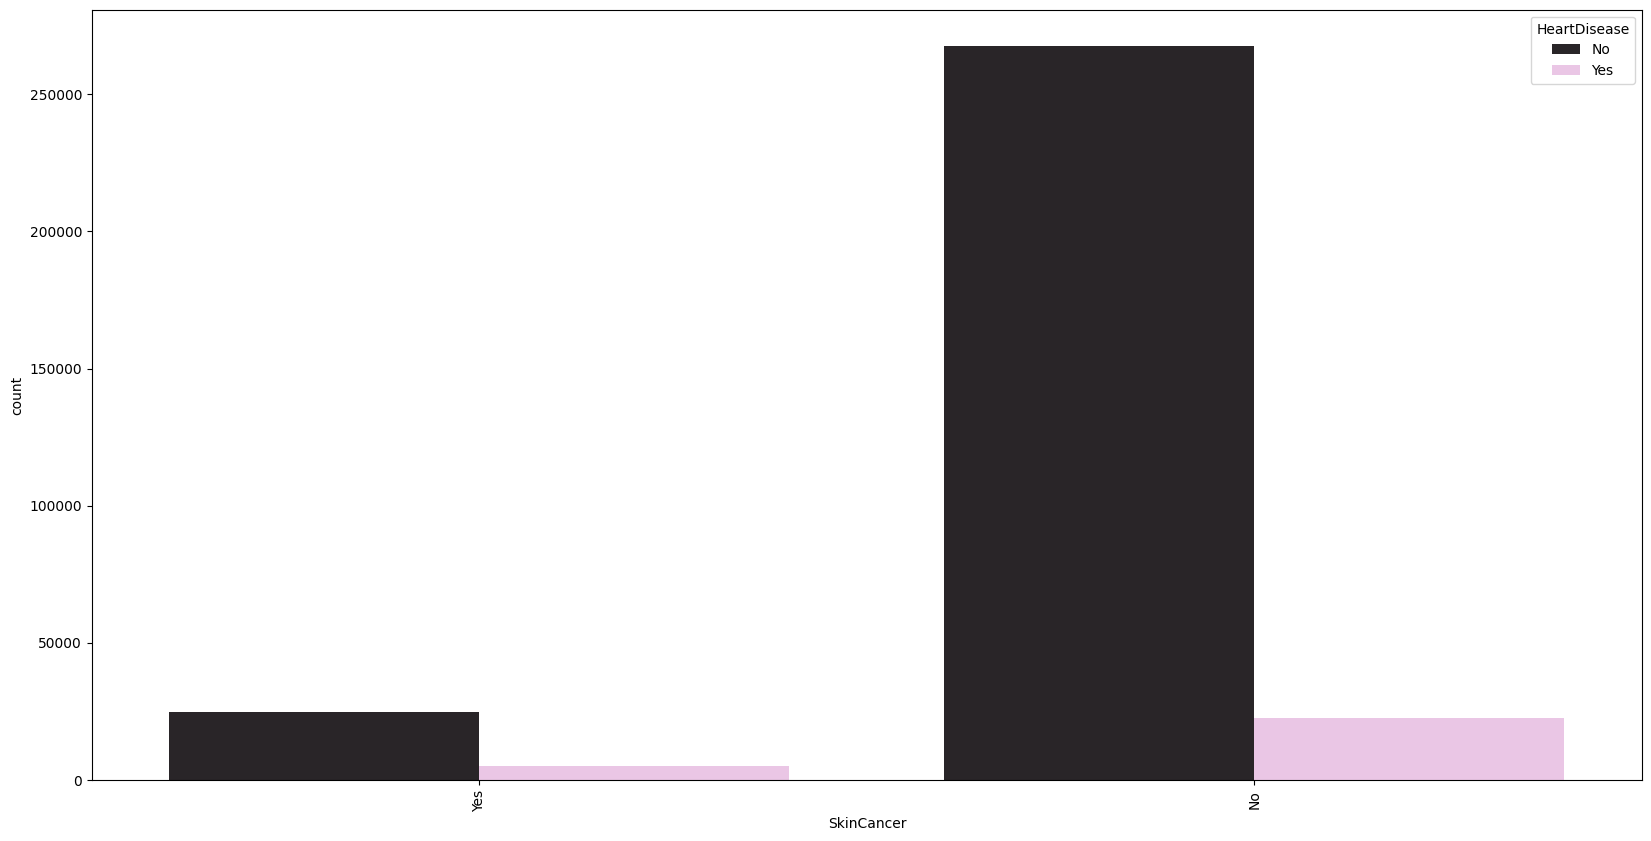

In [27]:
#distribution of ppl with heart disease
for feature in categorical_features:
  fig,ax1=plt.subplots(figsize=(20,10))
  graph=sns.countplot(x=feature,hue='HeartDisease',data=train,color='#f0c0e9')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  plt.show()
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

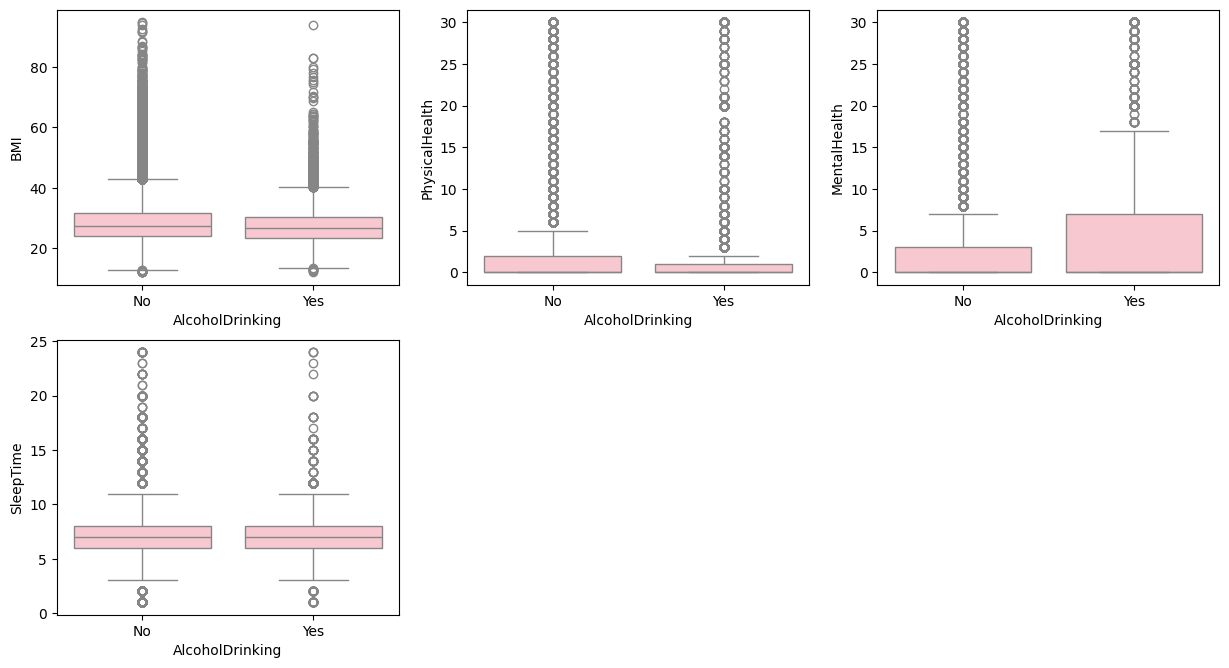

In [28]:
#outliners in numerical variables
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],x=train['AlcoholDrinking'],color='pink')
    i+=1

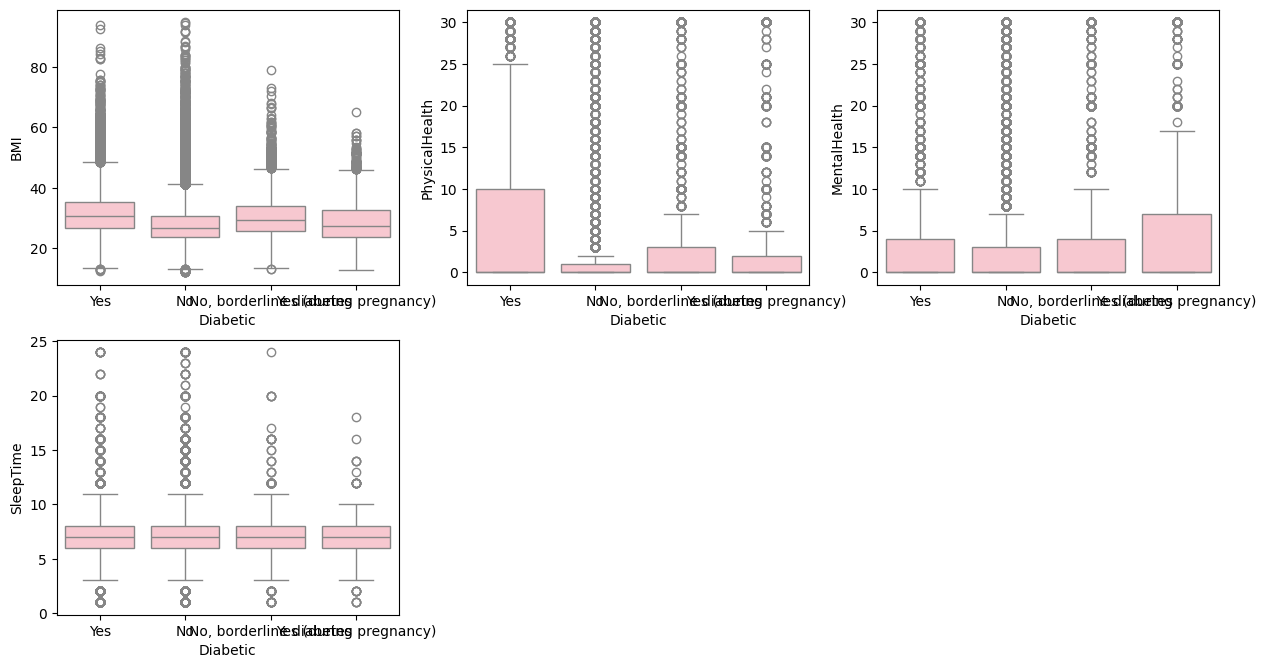

In [29]:
#outliners in numerical variables
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature],x=train['Diabetic'],color='pink')
    i+=1

###STASTICAL ANALYSIS

transforms categorical columns into integer codes using **Ordinal Encoding**

Imports the OrdinalEncoder, which converts each unique category in a column to an integer (0, 1, 2, ...).

Creates an instance of the encoder.

Fits the encoder on the specified categorical columns in the train DataFrame.

Internally maps each unique category in each feature to an integer.

Applies the encoding (transform) to the categorical features.

Replaces original categorical values with the corresponding integer codes.

Now all values in train[categorical_features] are numeric.



In [42]:

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[categorical_features])
train[categorical_features] = enc.transform(train[categorical_features])

PURPOSE: The **Shapiro-Wilk test** checks if a dataset follows a normal (Gaussian) distribution.

Null hypothesis (H₀): The data is normally distributed.

Alternative hypothesis (H₁): The data is not normally distributed.

Applies the Shapiro-Wilk test to the feature.

stat: The test statistic.

p: The p-value.

α = 0.05: Common significance level.

If p > 0.05: There's not enough evidence to say the data is not normal (you fail to reject H₀).

If p ≤ 0.05: The data is likely not normal (you reject H₀).

In [43]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(train[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.890, p=0.000
Sample does not look Gaussian (reject H0)


**Chi-Square Test of Independence** to check whether each categorical feature is associated with the target variable HeartDisease

PURPOSE:To determine if there is a statistically significant relationship between each categorical feature and the target variable HeartDisease.

Null hypothesis (H₀): The feature and target are independent (no association).

Alternative hypothesis (H₁): The feature and target are dependent (association exists).

Imports the Chi-Square test for independence from scipy.

Loops through all categorical columns in your dataset.

pd.crosstab creates a contingency table (frequency counts) between the feature and the target.

chi2_contingency performs the Chi-Square test on this table and returns:

stat: Test statistic

p: p-value

dof: Degrees of freedom

expected: Expected frequencies if the variables were independent

pd.crosstab creates a contingency table (frequency counts) between the feature and the target.

chi2_contingency performs the Chi-Square test on this table and returns:

stat: Test statistic

p: p-value

dof: Degrees of freedom

expected: Expected frequencies if the variables were independent

If p ≤ 0.05: The association is statistically significant → reject H₀, the feature is dependent on the target.

If p > 0.05: No significant relationship → fail to reject H₀, the feature is independent.

In [44]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(train[feature],train['HeartDisease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 1.892352227090306e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.9886131565632597e-180
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.2386144306283177e-121
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


displaying the **correlation of all features **with the target variable HeartDisease using the .corr() method in pandas.

train.corr()

Computes the Pearson correlation coefficient between numeric columns in the train DataFrame.

Returns a correlation matrix (square DataFrame).

correlation['HeartDisease']

Extracts the column of correlations between each feature and HeartDisease.

.sort_values(ascending=False)

Sorts features by how positively correlated they are with HeartDisease (highest to lowest).

In [45]:
correlation = train.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



GOAL:To visualize the correlation between the top 18 features (including HeartDisease) using a correlation heatmap with a custom pink color map.

correlation.nlargest(k, 'HeartDisease'): Selects the top 18 features with the highest correlation with HeartDisease (positive or less negative).

.index: Gets their column names.

Now cols is a list of the most important features for the heatmap.

Computes the correlation matrix for only those k features.

.T transposes the data so that features are columns (required by np.corrcoef).

Creates an upper-triangle mask (excluding the upper half of the heatmap).

np.triu returns the upper triangle of a matrix filled with 1s, to mask symmetric values for cleaner plots.

Sets up the figure and axes for the heatmap.

Adjusts the size for better readability.

Defines a custom pink color gradient using hex codes from light to dark pink.

This is applied as the heatmap color palette.

cm: Correlation matrix.

mask=mask: Hides the upper triangle (symmetric duplicate values).

vmax=.8: Sets max color scale to 0.8 for better contrast.

linewidths=0.01 & linecolor="white": Creates visual separation between squares.

square=True: Ensures square cells.

annot=True: Shows numeric correlation values inside cells.

xticklabels, yticklabels: Label rows/columns with selected feature names.



In [56]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (14,12))
pink_cmap = LinearSegmentedColormap.from_list("custom_pink", ["#ffe6f0", "#ff99cc", "#ff3385", "#cc0066"])
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap=pink_cmap,
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


KeyError: "['HeartDisease'] not in index"

###MACHINE LEARNING


train-test split

In [50]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

spliting target variable-heartdisease and all other variables

In [51]:
y=train['HeartDisease']
train.drop('HeartDisease',axis=1,inplace=True)

In [52]:
X_train, X_test, y_train, y_test=train_test_split(train,y,test_size=0.1,random_state=42)

cpmparing accuracy of multiple models

In [53]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9027517198248906
Precission_score: 0.3271428571428571
Recall_score: 0.0798465829846583
F1-score: 0.12836322869955158
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9115697310819262
Precission_score: 0.5423728813559322
Recall_score: 0.08926080892608089
F1-score: 0.1532934131736527
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=na

###RANDOM FOREST MODEL

In [54]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [55]:
#Random Forest Classifier

#import lib of random classifier model
from sklearn.ensemble import RandomForestClassifier

#create a random forest classifier
rf=RandomForestClassifier()

#Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15],
              'max_features': ['log2', 'sqrt','auto'],
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }
# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_


# Train the model using the training sets
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=3,
                       n_estimators=15)

In [58]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [59]:
from sklearn import metrics
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  91.18


###SUPPORT VECTOR MACHINE

In [60]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets
svc.fit(X_train,y_train)